In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
sns.set_style('whitegrid')

In [107]:
ratings_path = '../data/raw/ml-1m/ratings.dat'
movies_path = '../data/raw/ml-1m/movies.dat'

In [108]:
# Load ratings data
ratings = pd.read_csv(
    ratings_path, 
    sep='::', 
    engine='python', 
    names=['userId', 'movieId', 'rating', 'timestamp'], 
    encoding='latin-1'
)

In [109]:
movies = pd.read_csv(
    movies_path, 
    sep='::', 
    engine='python', 
    names=['movieId', 'title', 'genres'], 
    encoding='latin-1'
)

In [110]:
# Preview datasets
print("Ratings Dataset:")
print(ratings.head())

print("\nMovies Dataset:")
print(movies.head())

Ratings Dataset:
   userId  movieId  rating  timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

Movies Dataset:
   movieId                               title                        genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


In [111]:
# Ratings dataset information
print("\nRatings Dataset Info:")
print(ratings.info())


Ratings Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   userId     1000209 non-null  int64
 1   movieId    1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB
None


In [112]:
# Movies dataset information
print("\nMovies Dataset Info:")
print(movies.info())


Movies Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  3883 non-null   int64 
 1   title    3883 non-null   object
 2   genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None


In [113]:
# Missing values check
print("\nMissing Values in Ratings:")
print(ratings.isnull().sum())

print("\nMissing Values in Movies:")
print(movies.isnull().sum())


Missing Values in Ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing Values in Movies:
movieId    0
title      0
genres     0
dtype: int64


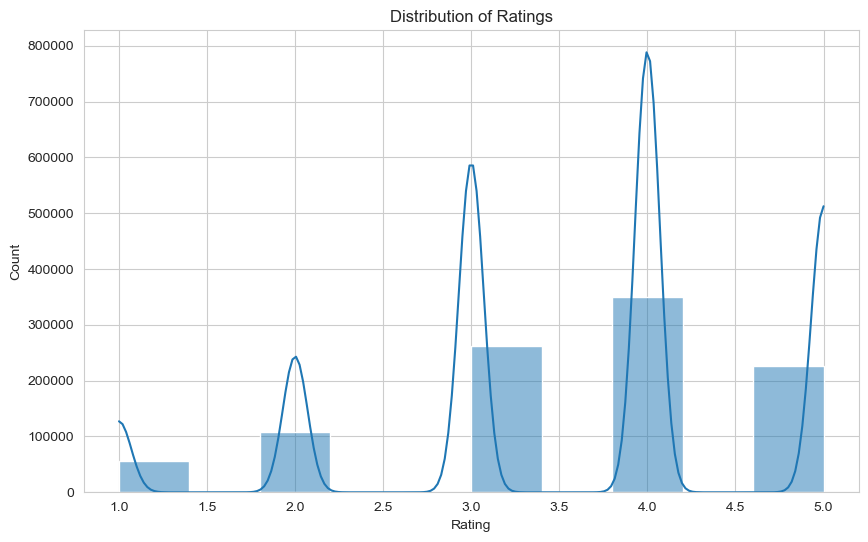

In [114]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

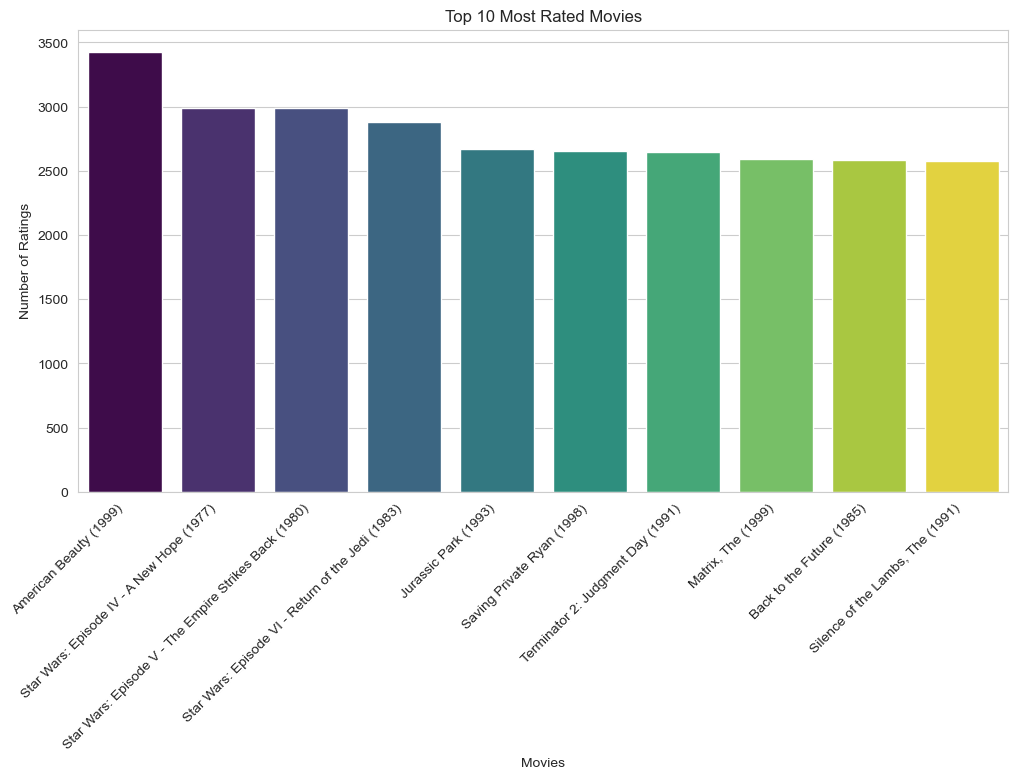

In [115]:
# Most Rated Movies
most_rated = ratings.groupby('movieId').size().sort_values(ascending=False).head(10)
most_rated_movies = most_rated.index.map(movies.set_index('movieId')['title'])

plt.figure(figsize=(12, 6))
hue_values = range(len(most_rated_movies))
sns.barplot(x=most_rated_movies, y=most_rated.values, hue=hue_values, palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Movies")
plt.ylabel("Number of Ratings")
plt.show()

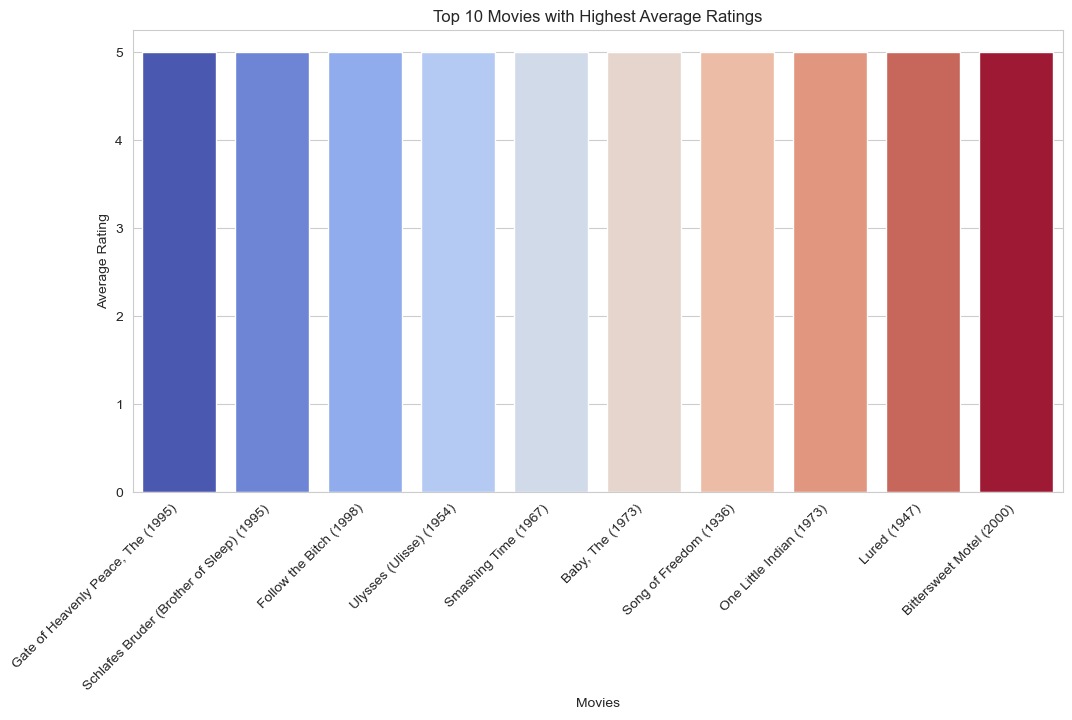

In [116]:
# Average Ratings per Movie
average_ratings = ratings.groupby('movieId')['rating'].mean()
top_rated_movies = average_ratings.nlargest(10).index.map(movies.set_index('movieId')['title'])

plt.figure(figsize=(12, 6))
sns.barplot(x=top_rated_movies, y=average_ratings.nlargest(10), hue=range(len(top_rated_movies)), palette='coolwarm', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Movies with Highest Average Ratings")
plt.xlabel("Movies")
plt.ylabel("Average Rating")
plt.show()

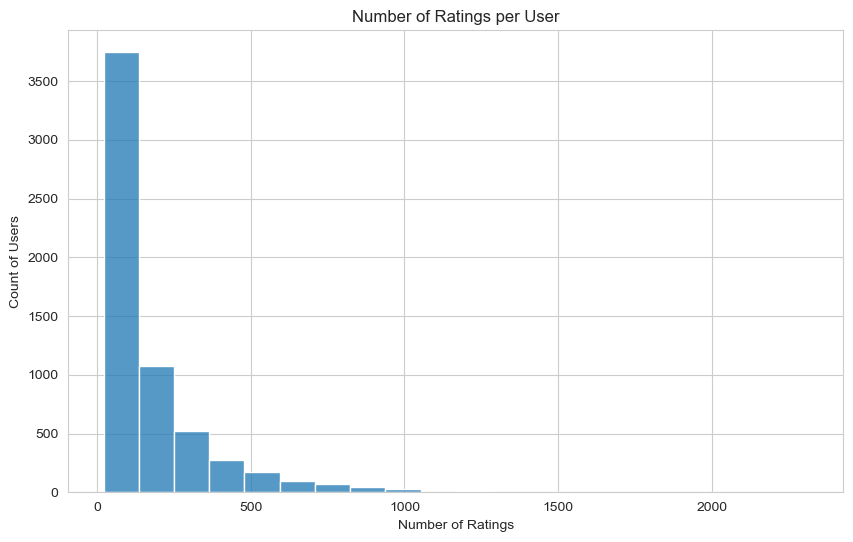

In [117]:
#Number of Ratings per User
ratings_per_user = ratings.groupby('userId').size()

plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=20, kde=False)
plt.title("Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Count of Users")
plt.show()

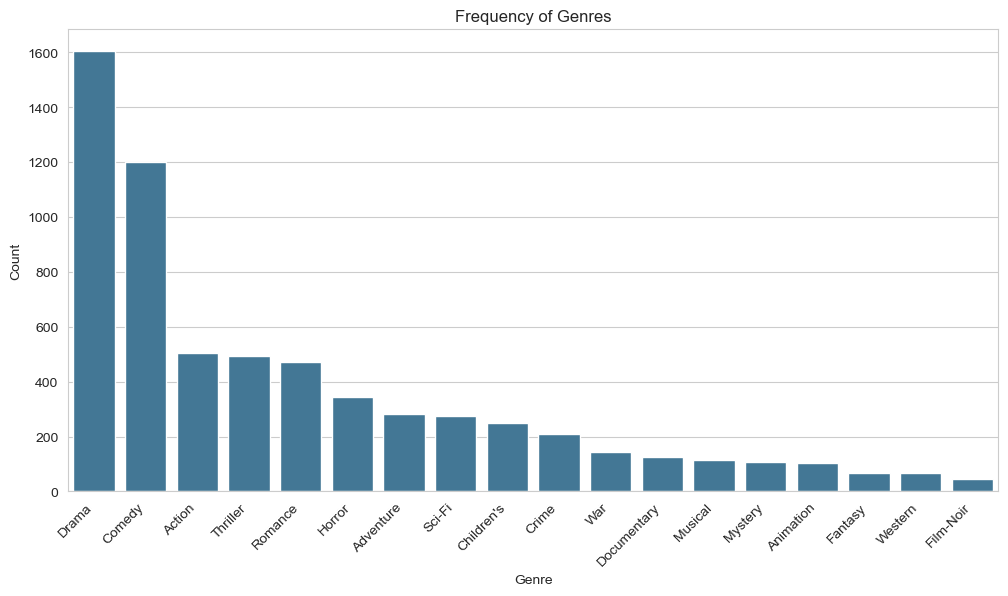

In [118]:
# Genre analysis
# Extract unique genres
movies['genres'] = movies['genres'].str.split('|')
all_genres = [genre for sublist in movies['genres'] for genre in sublist]
unique_genres = pd.Series(all_genres).value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=unique_genres.index, y=unique_genres.values, hue=False, palette='mako', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title("Frequency of Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

In [119]:
# Conclusion
# Distribution of ratings shows that a majority of movies are rated a 4
# The most rated movie is American Beauty with almost 3500 votes
# About 100 users rated over 3000 movies
# Dramas and Comedies are the most common genres in this dataset